# Data Augementation

Data Augmentation is a common technique to avoid overfitting and improve the accuracy of the model

In [1]:
import matplotlib.pyplot as plt
import tensorflow as tf
import PIL
import os
import cv2

from tensorflow import keras

In [2]:
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url,  cache_dir='.', untar=True)

228813984/228813984 [==============================] - 8s 0us/step


In [3]:
data_dir

'./datasets/flower_photos'

In [4]:
import pathlib
data_dir = pathlib.Path(data_dir)
data_dir

PosixPath('datasets/flower_photos')

In [5]:
list(data_dir.glob('*/*.jpg'))[:5]

[PosixPath('datasets/flower_photos/roses/15498482197_8878cdfb07_n.jpg'),
 PosixPath('datasets/flower_photos/roses/5181899042_0a6ffe0c8a_n.jpg'),
 PosixPath('datasets/flower_photos/roses/14970973709_968910640e_n.jpg'),
 PosixPath('datasets/flower_photos/roses/5231103167_a03280e9f6_n.jpg'),
 PosixPath('datasets/flower_photos/roses/3909587261_f8cd3e7fe7.jpg')]

In [6]:
img_count = len(list(data_dir.glob('*/*')))
img_count

3670

In [7]:
roses = list(data_dir.glob('roses/*'))
roses[:5]

[PosixPath('datasets/flower_photos/roses/15498482197_8878cdfb07_n.jpg'),
 PosixPath('datasets/flower_photos/roses/5181899042_0a6ffe0c8a_n.jpg'),
 PosixPath('datasets/flower_photos/roses/14970973709_968910640e_n.jpg'),
 PosixPath('datasets/flower_photos/roses/5231103167_a03280e9f6_n.jpg'),
 PosixPath('datasets/flower_photos/roses/3909587261_f8cd3e7fe7.jpg')]

In [8]:
str(roses[0])

'datasets/flower_photos/roses/15498482197_8878cdfb07_n.jpg'

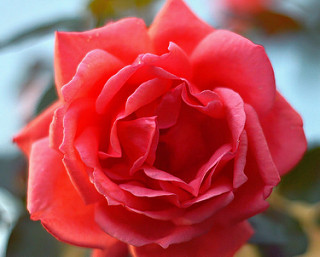

In [9]:
PIL.Image.open(str(roses[0]))

In [10]:
flowers_image_dict = {
    'roses' : list(data_dir.glob('roses/*')),
    'daisy' : list(data_dir.glob('daisy/*')),
    'sunflowers' : list(data_dir.glob('sunflowers/*')),
    'dandelion' : list(data_dir.glob('dandelion/*')),
    'tulips' : list(data_dir.glob('tulips/*'))
}

In [11]:
len(flowers_image_dict['roses'])

641

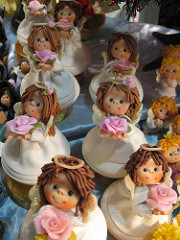

In [12]:
PIL.Image.open(str(flowers_image_dict['roses'][10]))

In [13]:
count_flowers = {}
for flowers in flowers_image_dict:
    length = len(flowers_image_dict[flowers])
    count_flowers[flowers] = length
count_flowers

{'roses': 641,
 'daisy': 633,
 'sunflowers': 699,
 'dandelion': 898,
 'tulips': 799}

In [14]:
img = cv2.imread(str(flowers_image_dict['roses'][0]))
img

array([[[248, 231, 188],
        [248, 230, 189],
        [248, 230, 189],
        ...,
        [141, 133, 104],
        [139, 131, 102],
        [137, 129, 100]],

       [[248, 231, 188],
        [248, 230, 189],
        [248, 230, 189],
        ...,
        [140, 131, 104],
        [138, 129, 102],
        [137, 129, 100]],

       [[251, 232, 189],
        [251, 231, 190],
        [250, 230, 189],
        ...,
        [138, 128, 104],
        [134, 127, 102],
        [133, 126,  99]],

       ...,

       [[203, 189, 166],
        [184, 175, 148],
        [164, 158, 129],
        ...,
        [ 90, 143, 180],
        [ 92, 144, 181],
        [ 93, 145, 182]],

       [[195, 181, 158],
        [181, 170, 143],
        [157, 152, 121],
        ...,
        [ 92, 144, 184],
        [ 94, 146, 183],
        [ 95, 147, 184]],

       [[189, 181, 152],
        [175, 164, 136],
        [157, 145, 117],
        ...,
        [ 95, 147, 183],
        [ 97, 148, 188],
        [ 97, 147, 189]]

In [15]:
img.shape

(257, 320, 3)

In [16]:
cv2.resize(img, (180,180)).shape

(180, 180, 3)

In [17]:
flowers_label_dict = {
    'roses' : 0,
    'daisy' : 1,
    'sunflowers' : 2,
    'dandelion': 3,
    'tulips' : 4
}

In [18]:
X, y = [], []

for flower_name, images in flowers_image_dict.items():
    for image in images:
        img = cv2.imread(str(image))
        img = cv2.resize(img, (180,180))
        X.append(img)
        y.append(flowers_label_dict[flower_name])
        
X[:2] , y[:2]

([array([[[248, 231, 188],
          [248, 230, 189],
          [248, 229, 191],
          ...,
          [148, 137, 110],
          [141, 133, 105],
          [138, 130, 101]],
  
         [[250, 231, 189],
          [249, 230, 189],
          [249, 229, 191],
          ...,
          [143, 132, 108],
          [139, 129, 104],
          [135, 127, 100]],
  
         [[251, 231, 189],
          [250, 230, 189],
          [250, 229, 191],
          ...,
          [138, 127, 105],
          [133, 125, 102],
          [131, 124, 100]],
  
         ...,
  
         [[201, 191, 164],
          [168, 162, 134],
          [128, 126,  96],
          ...,
          [ 84, 136, 172],
          [ 87, 140, 177],
          [ 90, 142, 179]],
  
         [[193, 181, 157],
          [158, 153, 123],
          [124, 120,  95],
          ...,
          [ 88, 141, 176],
          [ 90, 143, 181],
          [ 93, 145, 182]],
  
         [[185, 175, 147],
          [153, 144, 115],
          [113, 115,  87

In [19]:
import numpy as np
X = np.array(X)
y = np.array(y)

In [20]:
X = X/255

In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=10)

In [22]:
len(X_train)

2936

In [23]:
X_train[0]

array([[[0.07843137, 0.13333333, 0.08627451],
        [0.09411765, 0.14901961, 0.10196078],
        [0.12156863, 0.16862745, 0.12156863],
        ...,
        [0.        , 0.0627451 , 0.        ],
        [0.00784314, 0.05882353, 0.00392157],
        [0.        , 0.05882353, 0.00392157]],

       [[0.08235294, 0.1372549 , 0.09019608],
        [0.10196078, 0.15686275, 0.10980392],
        [0.12941176, 0.17647059, 0.12941176],
        ...,
        [0.        , 0.07843137, 0.00392157],
        [0.00392157, 0.07058824, 0.        ],
        [0.00392157, 0.06666667, 0.00392157]],

       [[0.08627451, 0.14117647, 0.09411765],
        [0.10980392, 0.16470588, 0.11764706],
        [0.1372549 , 0.18431373, 0.1372549 ],
        ...,
        [0.        , 0.10588235, 0.01176471],
        [0.        , 0.09019608, 0.00784314],
        [0.        , 0.08235294, 0.        ]],

       ...,

       [[0.18039216, 0.18823529, 0.14901961],
        [0.11764706, 0.14117647, 0.09803922],
        [0.05490196, 0

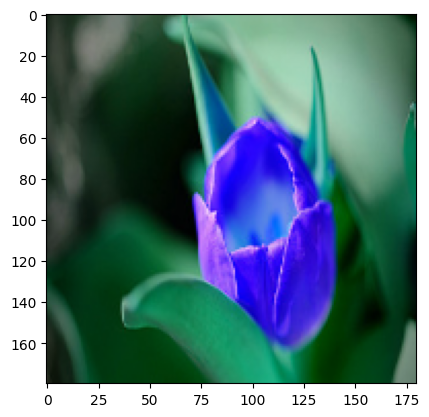

In [24]:
plt.imshow(X_train[0])

In [25]:
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [26]:
model = Sequential([
    layers.Conv2D(16,3,padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32,3,padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64,3,padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(128,activation='relu'),
    layers.Dense(5,activation='softmax')
])

model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

model.fit(X_train, y_train, epochs=10)

Epoch 1/10
92/92 [==============================] - 55s 583ms/step - loss: 1.3287 - accuracy: 0.4394
Epoch 2/10
92/92 [==============================] - 53s 573ms/step - loss: 1.0113 - accuracy: 0.6039
Epoch 3/10
92/92 [==============================] - 53s 576ms/step - loss: 0.8235 - accuracy: 0.6856
Epoch 4/10
92/92 [==============================] - 53s 576ms/step - loss: 0.6560 - accuracy: 0.7595
Epoch 5/10
92/92 [==============================] - 53s 578ms/step - loss: 0.4712 - accuracy: 0.8382
Epoch 6/10
92/92 [==============================] - 53s 581ms/step - loss: 0.2689 - accuracy: 0.9145
Epoch 7/10
92/92 [==============================] - 53s 580ms/step - loss: 0.1470 - accuracy: 0.9527
Epoch 8/10
92/92 [==============================] - 54s 586ms/step - loss: 0.0921 - accuracy: 0.9745
Epoch 9/10
92/92 [==============================] - 54s 589ms/step - loss: 0.0460 - accuracy: 0.9905
Epoch 10/10
92/92 [==============================] - 54s 584ms/step - loss: 0.0627 - accura

In [27]:
model.evaluate(X_test, y_test)

23/23 [==============================] - 4s 159ms/step - loss: 1.9161 - accuracy: 0.6253


[1.9161012172698975, 0.6253405809402466]

In [28]:
y_predicted = model.predict(X_test)
np.argmax(y_predicted[0])

23/23 [==============================] - 4s 182ms/step


1

In [29]:
y_pred = [np.argmax(i) for i in y_predicted]
y_pred[:5]

[1, 4, 4, 4, 4]

In [30]:
y_test[:5]

array([1, 4, 4, 3, 4])

In [31]:
cm = tf.math.confusion_matrix(labels=y_test, predictions=y_pred)
cm

<tf.Tensor: shape=(5, 5), dtype=int32, numpy=
array([[ 71,  13,   4,  12,  30],
       [ 14,  94,   7,  18,  14],
       [  3,  10,  76,  35,   7],
       [  5,  21,   5, 125,   7],
       [ 33,  18,   6,  13,  93]], dtype=int32)>

<Axes: >

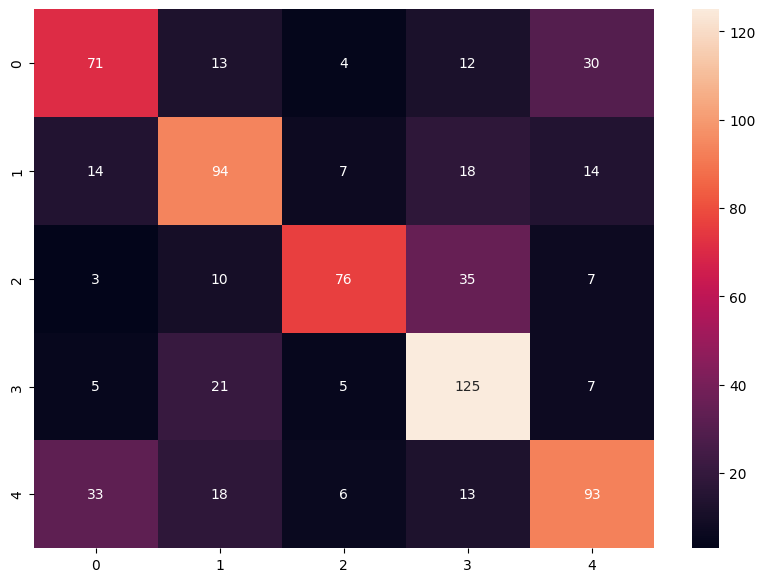

In [32]:
import seaborn as sn
%matplotlib inline
plt.figure(figsize=(10,7))
sn.heatmap(cm,annot=True,fmt='d')

# Data Augementation

In [33]:
data_augmentation = Sequential([
    keras.layers.RandomFlip("horizontal"),
    keras.layers.RandomZoom(0.1),
    keras.layers.RandomRotation(0.3),
    keras.layers.RandomContrast(0.4)
])

In [36]:
new_model = Sequential([
    data_augmentation,
    layers.Conv2D(16,3,padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32,3,padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64,3,padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(128,activation='relu'),
    layers.Dense(5,activation='softmax')
])

new_model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

new_model.fit(X_train, y_train, epochs=30)

Epoch 1/30
92/92 [==============================] - 65s 680ms/step - loss: 1.3104 - accuracy: 0.4547
Epoch 2/30
92/92 [==============================] - 61s 668ms/step - loss: 1.0993 - accuracy: 0.5528
Epoch 3/30
92/92 [==============================] - 61s 658ms/step - loss: 1.0045 - accuracy: 0.5967
Epoch 4/30
92/92 [==============================] - 60s 653ms/step - loss: 0.9725 - accuracy: 0.6080
Epoch 5/30
92/92 [==============================] - 60s 653ms/step - loss: 0.9088 - accuracy: 0.6356
Epoch 6/30
92/92 [==============================] - 73s 790ms/step - loss: 0.8992 - accuracy: 0.6485
Epoch 7/30
92/92 [==============================] - 61s 659ms/step - loss: 0.8866 - accuracy: 0.6502
Epoch 8/30
92/92 [==============================] - 63s 685ms/step - loss: 0.8193 - accuracy: 0.6812
Epoch 9/30
92/92 [==============================] - 62s 672ms/step - loss: 0.8179 - accuracy: 0.6761
Epoch 10/30
92/92 [==============================] - 61s 668ms/step - loss: 0.7905 - accura

In [38]:
new_model.evaluate(X_test, y_test)

23/23 [==============================] - 4s 149ms/step - loss: 0.8454 - accuracy: 0.6935


[0.8453846573829651, 0.6934604644775391]

In [39]:
y_predicted = new_model.predict(X_test)
y_predicted[0]

23/23 [==============================] - 3s 146ms/step


array([0.27052674, 0.38165706, 0.01351202, 0.23304774, 0.10125639],
      dtype=float32)

In [40]:
y_pred = [np.argmax(i) for i in y_predicted]
y_pred[:5]

[1, 0, 4, 0, 0]

In [41]:
cm = tf.math.confusion_matrix(labels=y_test, predictions=y_pred)
cm

<tf.Tensor: shape=(5, 5), dtype=int32, numpy=
array([[ 93,   4,   1,   3,  29],
       [ 14, 101,   0,   4,  28],
       [ 21,   5,  86,   9,  10],
       [ 15,  10,   6, 116,  16],
       [ 39,   6,   3,   2, 113]], dtype=int32)>

<Axes: >

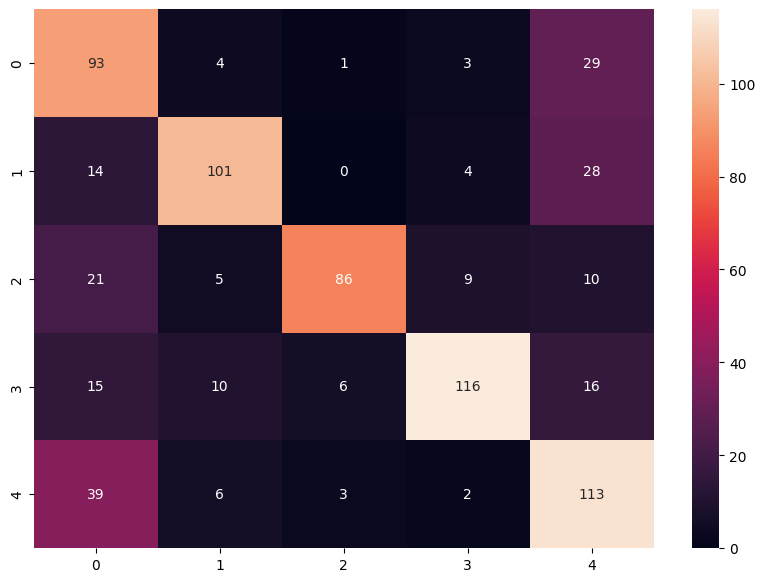

In [42]:
plt.figure(figsize=(10,7))
sn.heatmap(cm,annot=True,fmt='d')

The **Data Augemented approach** now losses on the train datasets accuracy but gains highly on thr test one.
The test set accuracy arose from 62.53% to 69.35%

In [43]:
new_model.save('./flower_model.keras')